In [1]:
import os, glob, time, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import astropy
from astropy.io import fits
import h5py

In [5]:
np.zeros(0)

array([], dtype=float64)

In [3]:
BAND = "g"

h5f = h5py.File("D:\\research\\stacked\\ALL\\stacked_%s_info.h5" % BAND, "w")
T0 = T1 = time.time()
# run = '206'
# camcol = 6

cnts_T = np.zeros(0)
for run in ["106", "206"]:
    for camcol in range(1, 7):
        FILE_LIST = sorted(
            glob.glob(
                "D:\\research\\stacked\\ALL\\%s\\%s\\*%s%d-*.fit.gz"
                % (run, BAND, BAND, camcol)
            )
        )
        RUNS = []
        for i in range(len(FILE_LIST)):
            RUNS.append([])
        for i in range(len(FILE_LIST)):
            RUNS[i].append(fits.open(FILE_LIST[i])[0].header[18:])

        cnts = np.ones(len(FILE_LIST))
        for j in range(len(FILE_LIST)):
            for i in range(len(RUNS[j][0]) - 1):
                if RUNS[j][0][i + 1][5:11] != RUNS[j][0][i][5:11]:
                    cnts[j] += 1
        h5f.create_dataset("cnts_%s_cc%d" % (run, camcol), data=cnts)
        for i in range(len(FILE_LIST)):
            if cnts[i] == 1:
                print(FILE_LIST[i])

        cnts_T = np.append(cnts_T, cnts)
        print("%0.2f, %0.2f" % (time.time() - T1, time.time() - T0))
        T1 = time.time()

h5f.close()
print("finished")

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
64.02, 64.02
95.70, 159.72
97.76, 257.48
96.30, 353.78
95.05, 448.83
89.35, 538.18
finished


In [11]:
cnts_T = np.zeros(0)

In [8]:
BAND = "r"
h5f = h5py.File("D:\\research\\stacked\\ALL\\stacked_%s_info.h5" % BAND, "r")
cnts_T = np.zeros(0)
for run in ["106", "206"]:
    for camcol in range(1, 7):
        cnts = h5f["cnts_%s_cc%d" % (run, camcol)][:]
        cnts_T = np.append(cnts_T, cnts)
h5f.close()

In [7]:
len(cnts)

739

28.0


(array([  2.,   2.,   4.,   5.,   1.,   3.,   0.,   4.,   4.,   0.,   5.,
          2.,  10.,  21.,  62., 165., 334., 398., 460., 386., 553., 862.,
        866., 481., 511., 566., 560., 516., 466., 393., 270., 332., 281.,
        204., 105.,  24.,   1.,   0.]),
 array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5]),
 <a list of 38 Patch objects>)

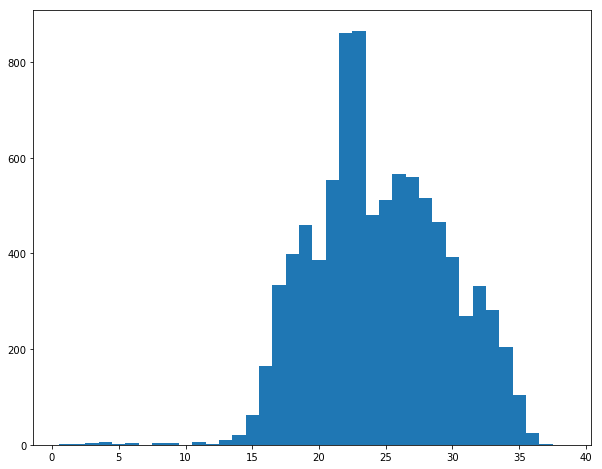

In [9]:
print(cnts.max() - cnts.min() + 1)
plt.rcParams["figure.figsize"] = (10, 8)
plt.hist(cnts_T, bins=38, range=(0.5, 38.5))
# plt.xlim(17,35)

28.0


(array([   2.,    2.,    4.,    5.,    1.,    3.,    0.,    4.,    4.,
           0.,    5.,    2.,   10.,   21.,   62.,  165.,  334.,  398.,
         460.,  386.,  553.,  862.,  866.,  481.,  511.,  566.,  560.,
         516.,  466.,  393.,  270.,  332.,  281.,  204.,  105.,   24.,
           1.,    0.]),
 array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
         18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,
         27.5,  28.5,  29.5,  30.5,  31.5,  32.5,  33.5,  34.5,  35.5,
         36.5,  37.5,  38.5]),
 <a list of 38 Patch objects>)

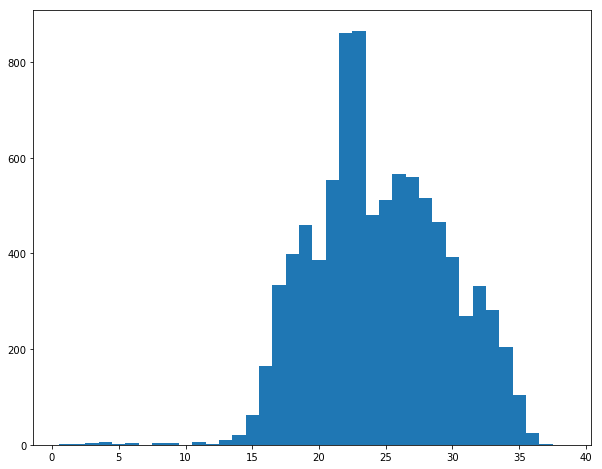

In [10]:
print(cnts.max() - cnts.min() + 1)
plt.rcParams["figure.figsize"] = (10, 8)
plt.hist(cnts_T, bins=38, range=(0.5, 38.5))
# plt.xlim(17,35)

(0, 40)

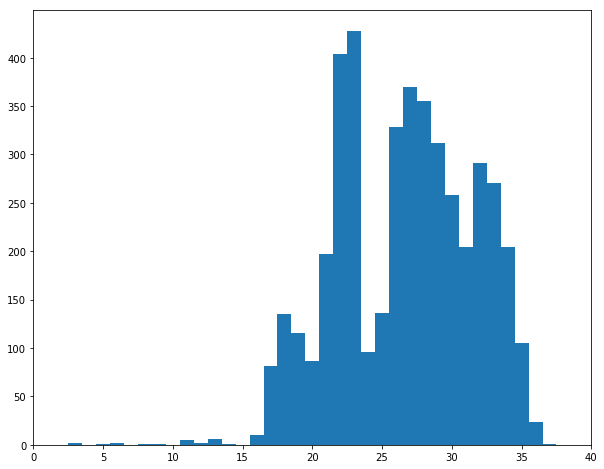

In [6]:
hist_array = plt.hist(cnts_T, bins=40, range=(-0.5, 39.5))[0]
plt.xlim(0, 40)

In [16]:
hist_array[0]

0.0

In [5]:
B = np.linspace(0, 39, 40)

In [6]:
C = 0
for i in range(len(B)):
    C += hist_array[i] * B[i]
print(C)
print(C / np.sum(hist_array))
print(np.sqrt(C / np.sum(hist_array)))

217911.0
24.57273342354533
4.957089208753997


In [9]:
C = 0
for i in range(15, 35):
    C += hist_array[i] * B[i]
print(C)
print(C / np.sum(hist_array[15:35]))
print(np.sqrt(C / np.sum(hist_array[15:35])))

212703.0
24.519077809798272
4.9516742431018494


In [24]:
AAAA = 28
BBBB = 0
for i in range(len(cnts_T)):
    if cnts_T[i] == AAAA:
        BBBB += 1
print(BBBB)

310


In [2]:
HDUF = fits.open("E:\\cGAN\\tsField-004207-2-40-0264.fit")

In [41]:
HDUF = fits.open("E:\\cGAN\\tsField-200006-2-2-0294.fit")

In [3]:
HDUF.info()

Filename: E:\cGAN\tsField-004207-2-40-0264.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      30   ()      
  1                1 BinTableHDU    241   1R x 98C   [1J, 1J, 5D, 5D, 5D, 5D, 5D, 5D, 5D, 5D, 5D, 5D, 5D, 5D, 5D, 5D, 5D, 5D, 5D, 5D, 5D, 5D, 5D, 5D, 5D, 1J, 5J, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 1J, 5E, 5E, 1J, 1J, 1J, 1J, 5J, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5J, 5J, 5J, 5E, 5E, 5E, 5E, 1J, 5J, 5E, 5E, 5E, 5E, 5E, 5E, 5J, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5J, 75E, 75E, 75E, 5E, 5E, 1E, 1E, 1J, 1J, 1J, 1J, 1J]   


In [4]:
HDUF[1].header

XTENSION= 'BINTABLE'                                                            
BITPIX  =                    8                                                  
NAXIS   =                    2                                                  
NAXIS1  =                 3004                                                  
NAXIS2  =                    1                                                  
PCOUNT  =                    0                                                  
GCOUNT  =                    1                                                  
TFIELDS =                   98                                                  
TFORM1  = '1J      '                                                            
TTYPE1  = 'field   '                                                            
TFORM2  = '1J      '                                                            
TTYPE2  = 'quality '                                                            
TFORM3  = '5D      '        

In [3]:
HDUF[1].data[0][27]

array([-23.835411, -24.437168, -24.039036, -23.626959, -21.94777 ],
      dtype=float32)

In [46]:
HDUF = fits.open("E:\\cGAN\\asTrans-004207.fit")

In [66]:
HDUF.info()

Filename: E:\cGAN\asTrans-004207.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      25   ()      
  1                1 BinTableHDU     59   763R x 24C   ['1J', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1E', '1E']   
  2                1 BinTableHDU     59   763R x 24C   ['1J', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1E', '1E']   
  3                1 BinTableHDU     59   763R x 24C   [1J, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1E, 1E]   
  4                1 BinTableHDU     59   763R x 24C   [1J, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1E, 1E]   
  5                1 BinTableHDU     59   763R x 24C   [1J, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D

In [75]:
HDUF[6].header

XTENSION= 'BINTABLE'                                                            
BITPIX  =                    8                                                  
NAXIS   =                    2                                                  
NAXIS1  =                  180                                                  
NAXIS2  =                  763                                                  
PCOUNT  =                    0                                                  
GCOUNT  =                    1                                                  
TFIELDS =                   24                                                  
FILTER  = 'r       '                                                            
CAMROW  =                    1                                                  
CAMCOL  =                    2                                                  
TFORM1  = '1J      '                                                            
TTYPE1  = 'field   '        